In [23]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
I_0 = 1 #for simplicity and could be adapted with weights
eta = 376.7

def U_dipole(k,l,theta):
    U = (eta*k**2)/(32*np.pi**2)*(l**2)*np.sin(theta)**2
    return U

def U_standing_wave(k,l, theta):
    U = (eta)/(8*np.pi**2*np.sin(theta)**2)*(np.cos(np.cos(theta)*(k*l)/2)-np.cos((k*l)/2))**2
    return U

def U_half_wave(k, l, theta):
    k = 2*np.pi
    l= 1/2
    return U_standing_wave(k, l, theta)

def get_U(atype,k,l,theta):
    """
    1: dipole
    2: standing wave
    3: half wave
    """
    if atype == 1:
        return U_dipole(k,l,theta)
    elif atype == 2:
        return U_standing_wave(k,l,theta)
    elif atype == 3:
        return U_half_wave(k,l,theta)
    else:
        return None
    

In [25]:
def convert_in_dB(U):
    return 10*np.log10(U)

In [26]:
def C_k(k,l, weights, positions, theta, phi):
    """
    k: wavenumber
    l: length of the antennas !in units of lambda!
    weights: list of each weight a_n
    positions: list of position of each antenna (x, y, z) !coordinates in units of lambda!
    """
    N = len(weights) #length of the array i.e number of element in the array
    k_x = k*np.sin(theta)*np.cos(phi)
    k_y = k*np.sin(theta)*np.sin(phi)
    k_z = k*np.cos(theta)
    wavelength = 2*np.pi/k
    C = 0
    for n in range(0, N):
        x = positions[n][0]*wavelength
        y = positions[n][1]*wavelength
        z = positions[n][2]*wavelength
        term1 = k_x*x
        term2 = k_y*y
        term3 = k_z*z
        C += weights[n]*np.exp(1j*(term1+term2+term3))
        
    
    return C

def power_gain(k,l, weights, positions, theta, phi, atype):
    """
    atype: antenna type(0: power gain only 1: dipole, 2: standing wave antenna, 3: half wave antenna)
    """
    C = C_k(k,l, weights, positions, theta, phi)
    C = abs(C)**2
    if atype != 0:
        U = get_U(atype,k,l,theta)
        C = U*C
    return C

def power_gain_dB(g):
    # convert to dB, clip at –40 dB, then normalize to [0,1]
    g_db = 10 * np.log10(np.clip(g, 1e-12, None))
    g_db = np.clip(g_db, -45, None)
    return (g_db + 45) / 45 
def plot_powergain_2D(k, l, weights, positions, atype):
    theta = np.pi/2 
    phi = np.linspace(0, 2*np.pi, 401)
    g = power_gain(k, l, weights, positions, theta, phi, atype)
    g = g/np.max(g)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(phi, g, linewidth=1)
    
    ax.set_title(f'Normalized Radiation Pattern')
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Optional: radius ticks
    ax.grid(True)
    
    ax.legend()
    plt.show()
    
    #Now in dB
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(phi, power_gain_dB(g), linewidth=1)
    
    ax.set_title(f'Normalized Radiation Pattern (dB)')
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Optional: radius ticks
    ax.grid(True)
    
    ax.legend()
    plt.show()

[ 7.07106781e-01-7.07106781e-01j -4.66390246e+00-4.44089210e-16j
  6.37100924e+00+6.37100924e+00j  8.88178420e-16-9.00996768e+00j
 -3.29787706e+00+3.29787706e+00j  1.00000000e+00+0.00000000e+00j]
[ 0.70710678-0.70710678j -3.29787706+3.29787706j  6.37100924-6.37100924j
 -6.37100924+6.37100924j  3.29787706-3.29787706j -0.70710678+0.70710678j]


C:\Users\yanis\AppData\Local\Temp\ipykernel_50080\2570643898.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


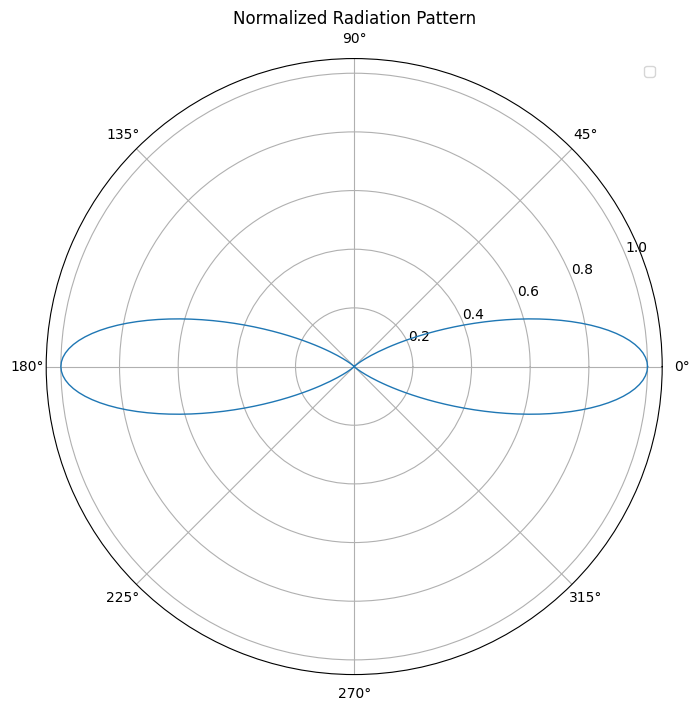

C:\Users\yanis\AppData\Local\Temp\ipykernel_50080\2570643898.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


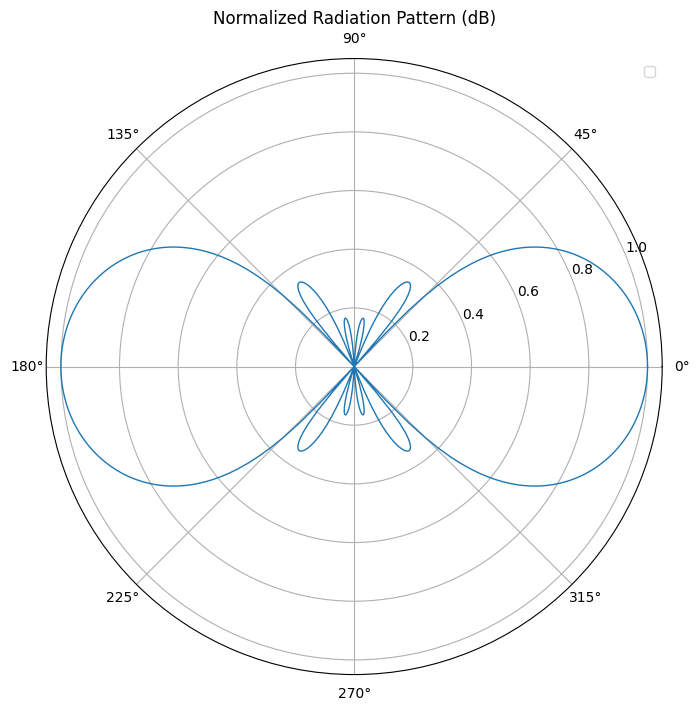

[ 1.00000000e+00+0.00000000e+00j  7.07106781e-01-7.07106781e-01j
  6.12323400e-17-1.00000000e+00j -7.07106781e-01-7.07106781e-01j
 -1.00000000e+00-1.22464680e-16j -7.07106781e-01+7.07106781e-01j]


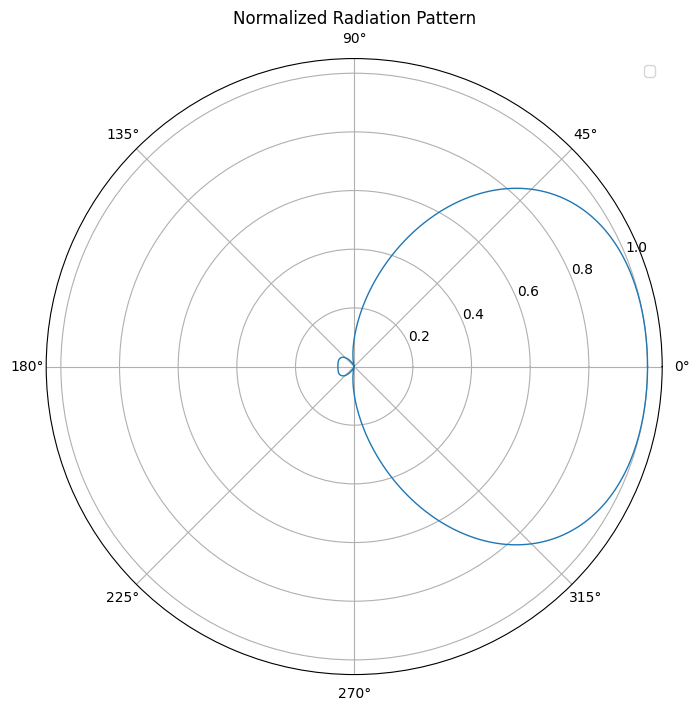

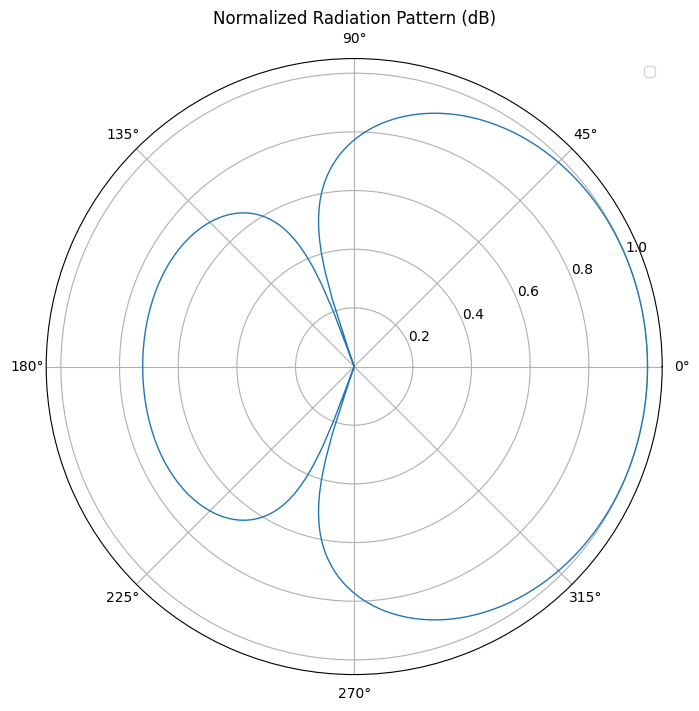

In [27]:
d = 1/8
N = 6

# define k, l
k = 2*np.pi    # λ = 1
l = 1          # element length = 1 λ

# pick N-1 zeros to get N weights
i = np.arange(1, N)                  
kd = k*d
psi = -2*kd*i/N      
zi  = np.exp(1j*psi)

p       = np.poly(zi)    # length N
weights = p[::-1]
print(weights)        # length N
n       = np.arange(N)   # now matches

# apply steering
alpha      = 0
psi_shift  = k*d*np.cos(np.deg2rad(alpha))
weights   *= np.exp(-1j*n*psi_shift)
print(weights)

# geometry
positions = [(n_i*d, 0, 0) for n_i in n]

# finally call your plot function
plot_powergain_2D(k, l, weights, positions, 0)

weights = [1]*N
alpha      = 0
psi_shift  = k*d*np.cos(np.deg2rad(alpha))
weights   *= np.exp(-1j*n*psi_shift)
print(weights)
plot_powergain_2D(k, l, weights, positions, 0)

